🧠 Objective:
Predict the Purchase Amount (USD) using features like age, gender, category, season, etc., to understand what drives customer spending.
Regression-Based Sales Forecasting (Random Forest Regressor)

In [4]:
# 1. 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [5]:
# 2. 📂 Load Dataset
df = pd.read_csv("shopping_trends_updated.csv")  # Replace with your file path
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
# 3. 🧹 Data Cleaning
# Drop irrelevant or unique identifier columns
df.drop(columns=["Customer ID", "Item Purchased"], inplace=True)

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Check column types
df.dtypes


Age                         int64
Gender                     object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [7]:
# 4. 🔤 Encode Categorical Columns
label_enc = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])


In [8]:
# 5. 📊 Feature and Target Separation
X = df.drop("Purchase Amount (USD)", axis=1)
y = df["Purchase Amount (USD)"]


In [9]:
# 6. ✂️ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# 7. 📏 Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# 8. 🤖 Train Regression Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [12]:
# 9. 📈 Make Predictions
y_pred = model.predict(X_test_scaled)


In [13]:
# 10. 🧪 Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


MAE: 20.87
RMSE: 24.02
R^2 Score: -0.03


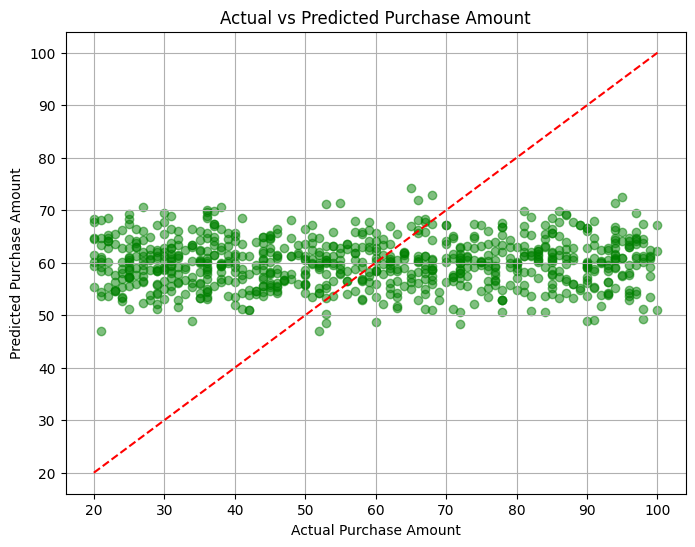

In [14]:
# 11. 📊 Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, c='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted Purchase Amount")
plt.grid(True)
plt.show()


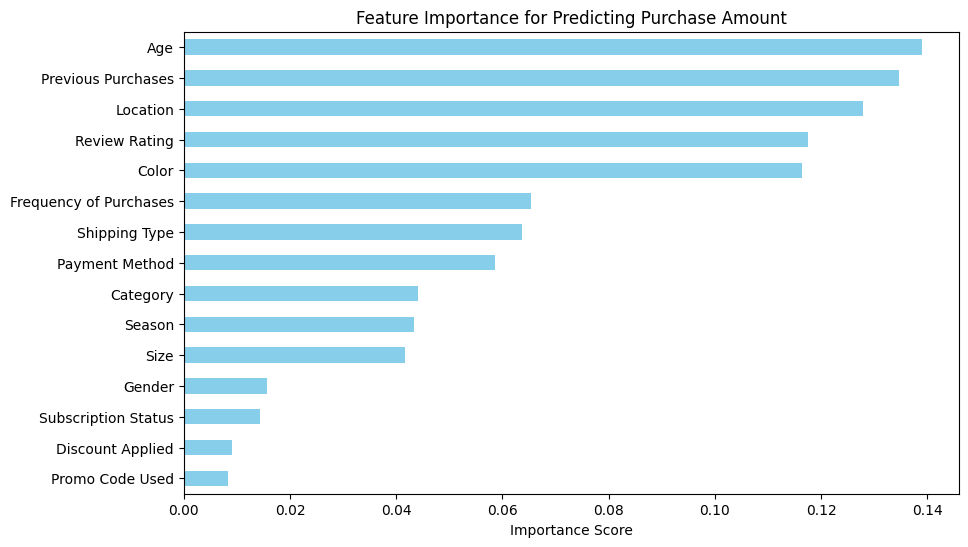

In [15]:
# 12. 🌟 Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Feature Importance for Predicting Purchase Amount")
plt.xlabel("Importance Score")
plt.show()


📌 Business Insights

Which features most influence spending? (e.g., Season, Gender, Discount) 
AGE

Which seasons lead to higher spending?
FORTNIGHTLY

Do subscription holders spend more?
NO


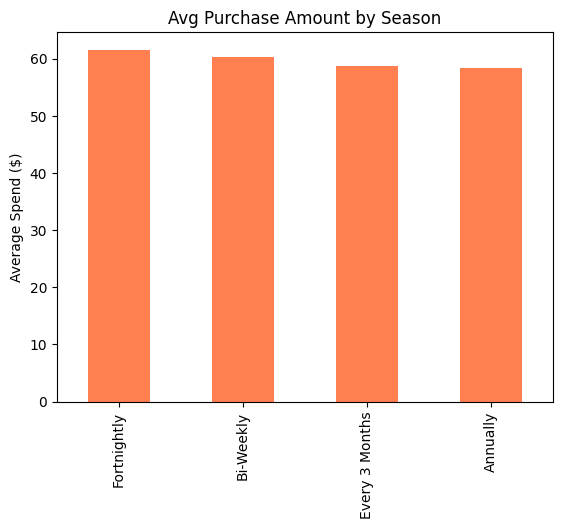

In [16]:
# Example: Average spend by season
season_map = label_enc.inverse_transform(df['Season'].unique())
season_data = df.groupby('Season')["Purchase Amount (USD)"].mean().sort_values(ascending=False)
season_data.index = season_map
season_data.plot(kind='bar', title="Avg Purchase Amount by Season", color='coral')
plt.ylabel("Average Spend ($)")
plt.show()


In [17]:
import joblib
joblib.dump(model, "purchase_amount_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

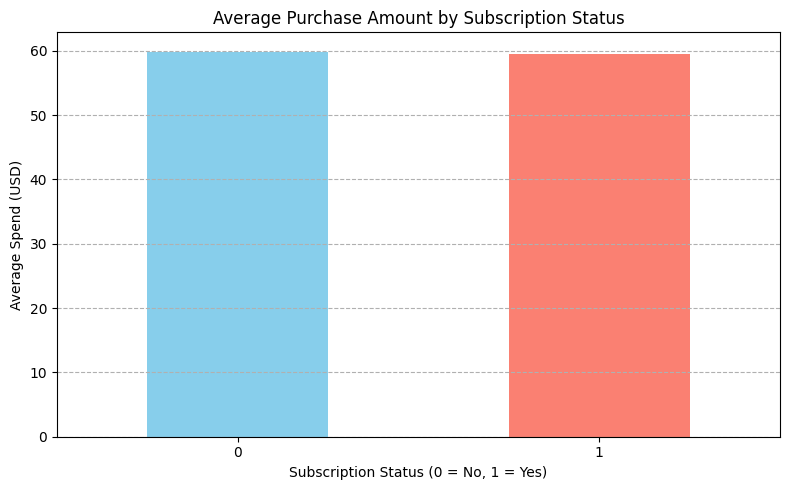

In [18]:
# Group by Subscription Status and calculate average purchase amount
subscription_spending = df.groupby("Subscription Status")["Purchase Amount (USD)"].mean()

# Visualize
subscription_spending.plot(kind="bar", color=["skyblue", "salmon"], figsize=(8, 5))
plt.title("Average Purchase Amount by Subscription Status")
plt.xlabel("Subscription Status (0 = No, 1 = Yes)")
plt.ylabel("Average Spend (USD)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


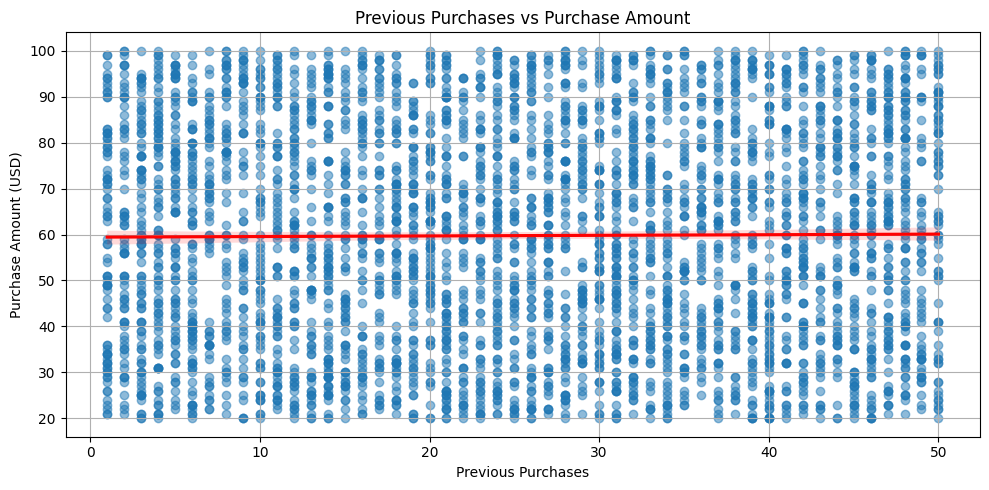

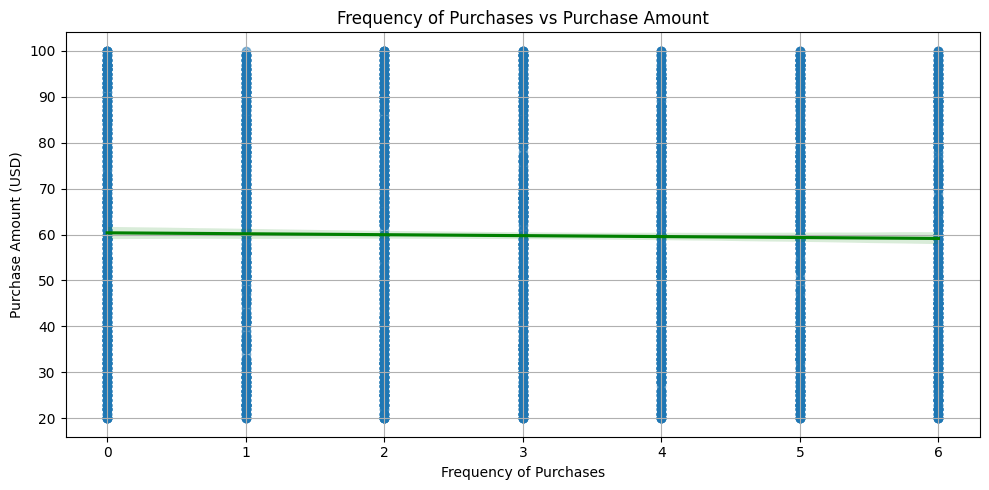

In [19]:
# Scatter plot: Previous Purchases vs Purchase Amount
plt.figure(figsize=(10, 5))
sns.regplot(x="Previous Purchases", y="Purchase Amount (USD)", data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Previous Purchases vs Purchase Amount")
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot: Frequency of Purchases vs Purchase Amount
plt.figure(figsize=(10, 5))
sns.regplot(x="Frequency of Purchases", y="Purchase Amount (USD)", data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"green"})
plt.title("Frequency of Purchases vs Purchase Amount")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


Before vs After: Business Value Simulation
🎯 Goal: Simulate a use case where your model increases ROI.
🔸Case Study: Promo Code Campaign

In [23]:
# Let's say company sent promo codes to 1000 random users and got 15% usage (baseline)
baseline_users = 1000
baseline_conversion = 0.15
baseline_cost = 0.2  # assume $0.2 per promo sent
baseline_revenue_per_conversion = 50

baseline_total_cost = baseline_users * baseline_cost
baseline_total_revenue = baseline_users * baseline_conversion * baseline_revenue_per_conversion
baseline_roi = baseline_total_revenue - baseline_total_cost


In [24]:
# With ML model: select top 300 most likely users to use promo (e.g., based on classification model)
targeted_users = 300
predicted_conversion = 0.45  # assume model selects high-conversion users
targeted_cost = 0.2
targeted_revenue_per_conversion = 50

targeted_total_cost = targeted_users * targeted_cost
targeted_total_revenue = targeted_users * predicted_conversion * targeted_revenue_per_conversion
targeted_roi = targeted_total_revenue - targeted_total_cost


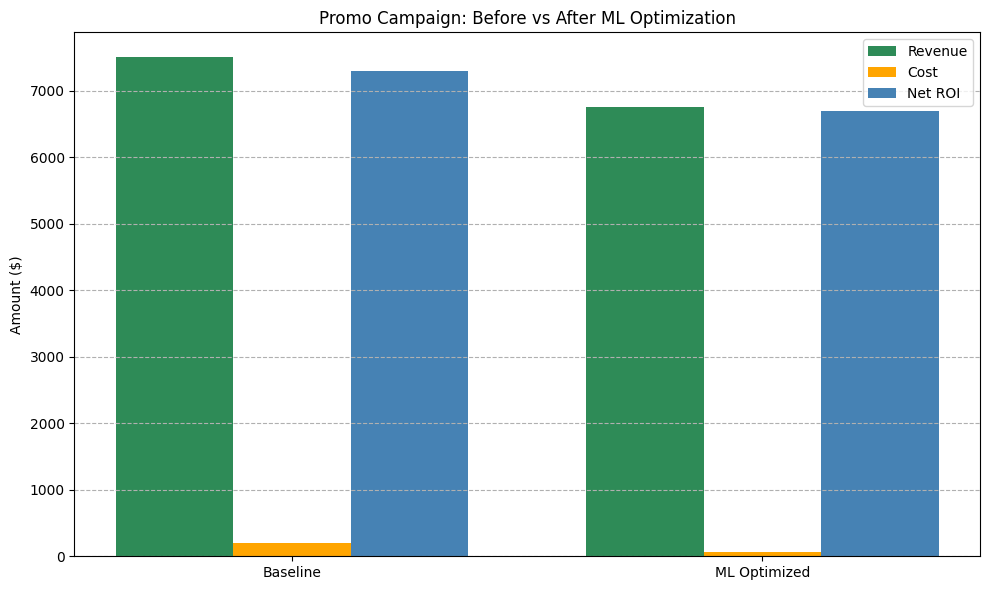

In [25]:
# Plot Before vs After
labels = ['Baseline', 'ML Optimized']
revenue = [baseline_total_revenue, targeted_total_revenue]
costs = [baseline_total_cost, targeted_total_cost]
roi = [baseline_roi, targeted_roi]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, revenue, width, label='Revenue', color='seagreen')
plt.bar(x, costs, width, label='Cost', color='orange')
plt.bar(x + width, roi, width, label='Net ROI', color='steelblue')
plt.xticks(x, labels)
plt.ylabel('Amount ($)')
plt.title('Promo Campaign: Before vs After ML Optimization')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
